In [3]:

# Liste des fichiers à traiter
import spacy
from spacy.matcher import Matcher
from collections import Counter
import pandas as pd

# Charger le modèle SpaCy
nlp = spacy.load('en_core_web_md')
nlp.max_length = 3100000

# Définir le schéma du matcher
matcher = Matcher(nlp.vocab)
p1 = [{'POS': 'PROPN'}]
matcher.add("personne", [p1])

# Liste des fichiers à traiter
fichiers = ['TheHobbit-J.R.R.Tolkien.txt', 'Unfinished-Tales-of-Numenor-and-Middl...-Z-Library.txt', 'The-Letters-of-J-R-R-Tolkien-Tolkien-John-Ronald-Reuel-Z-Library.txt','The-Fall-of-Gondolin-J.-R.-R.-Tolkien-Christopher-Tolkien-Z-Library.txt','The-Children-of-Húrin-J.-R.-R.-Tolkien-Christopher-Tolkien-Z-Library.txt','The-Silmarillion-Tolkien-J.R.R.2004-Z-Library.txt','The-Lord-of-the-Rings.txt']  # Remplacez par vos noms de fichiers

# Initialiser le dictionnaire des fréquences globales
frequences_globales = Counter()

# Initialiser un dictionnaire pour stocker les fréquences par texte
frequences_par_texte = {fichier: Counter() for fichier in fichiers}

# Parcourir chaque fichier
for fichier in fichiers:
    with open(fichier, 'r', encoding='utf-8') as f:
        contenu = f.read()
        doc = nlp(contenu)
        matches = matcher(doc)
        liste = [doc[debut:fin].text for id_match, debut, fin in matches]
        frequences = Counter(liste)
        frequences_par_texte[fichier] = frequences
        frequences_globales.update(frequences)

# Extraire les 100 mots les plus fréquents globalement
mots_plus_frequents = [mot for mot, freq in frequences_globales.most_common(100)]

# Créer un dictionnaire pour construire le DataFrame
data = {'Mot': mots_plus_frequents}
for fichier in fichiers:
    nom_colonne = fichier[:10]
    data[nom_colonne] = [frequences_par_texte[fichier][mot] for mot in mots_plus_frequents]

# Créer le DataFrame
df_global = pd.DataFrame(data)

df_global




,Mot,TheHobbit-,Unfinished,The-Letter,The-Fall-o,The-Childr,The-Silmar,The-Lord-o
0,Frodo,0,26,107,4,2,2,1792
1,Gandalf,175,207,97,3,0,7,1159
2,Sam,0,5,62,2,0,1,1298
3,Túrin,0,526,2,20,614,0,9
4,Lord,18,291,269,71,43,97,334
...,...,...,...,...,...,...,...,...
95,Elendil,0,77,15,0,0,55,98
96,Forest,22,83,6,1,20,24,87
97,Lórien,0,112,6,8,0,0,113
98,Baggins,96,19,19,0,0,0,104


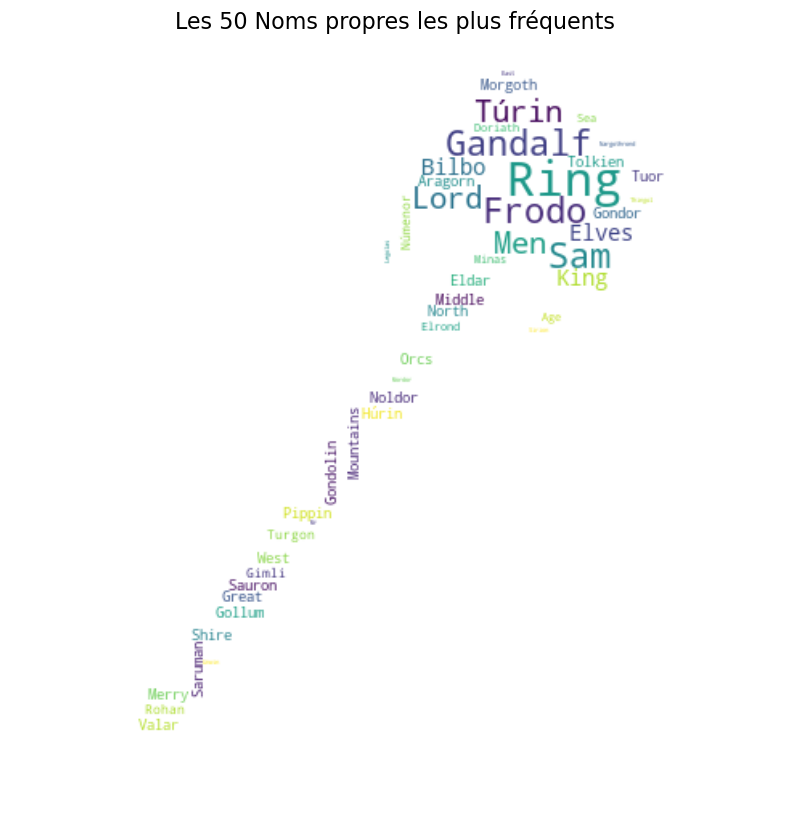

In [26]:
import numpy as np
from PIL import Image
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# Extraire les 50 mots les plus fréquents globalement
mots_plus_frequents_global = [mot for mot, freq in frequences_globales.most_common(50)]

mask = np.array(Image.open("hache.jpg"))

# Créer un WordCloud des 50 mots les plus fréquents globalement
wordcloud_global = WordCloud(width=800, height=400, background_color='white', max_words=50, mask=mask).generate(" ".join(mots_plus_frequents_global))

# Afficher le wordcloud global

plt.figure(figsize=(20, 10))
plt.imshow(wordcloud_global, interpolation='bilinear')
plt.axis("off")
plt.title('Les 50 Noms propres les plus fréquents', fontsize=16)
plt.show()

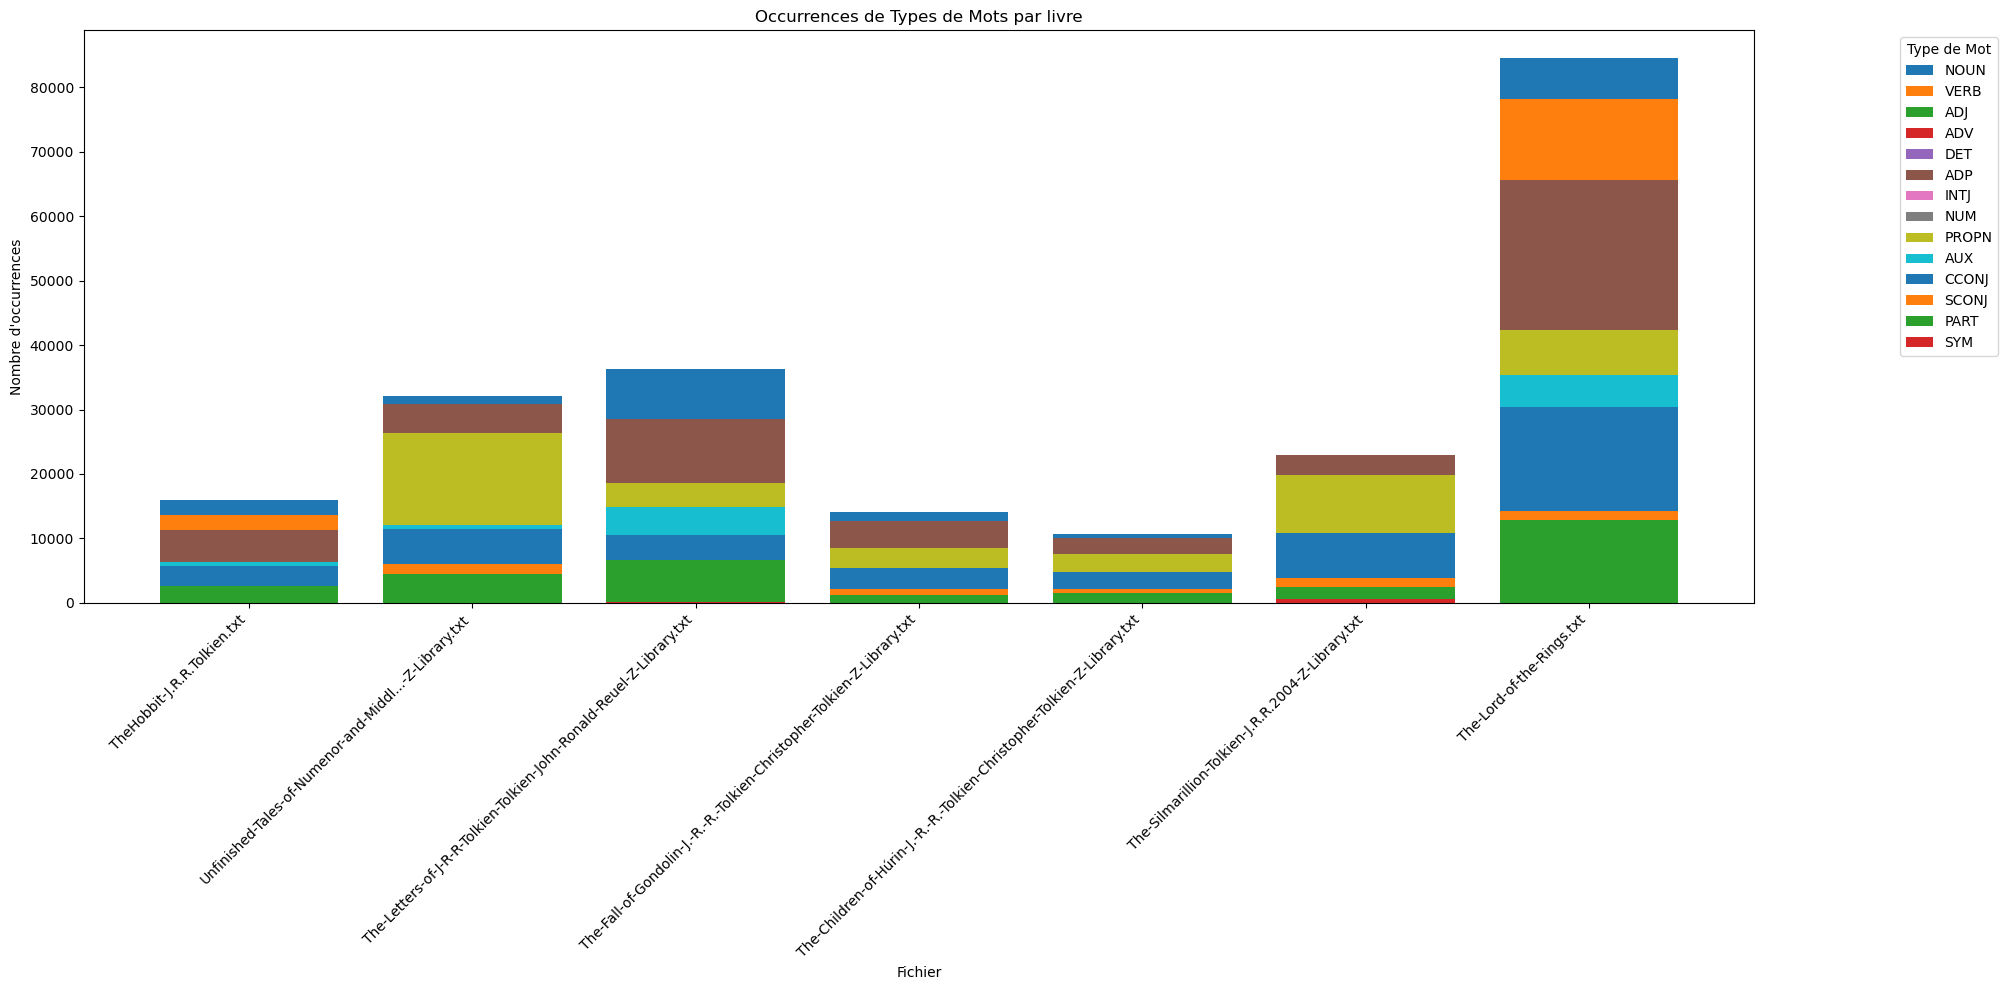

In [8]:
# Initialiser un dictionnaire pour stocker les fréquences par type de mot
# Initialiser un dictionnaire pour stocker les fréquences par type de mot
types_de_mots = [
    'NOUN', 'VERB', 'ADJ', 'ADV',
    'DET', 'ADP', 'INTJ',
    'NUM', 'PROPN', 'AUX',
    'CCONJ', 'SCONJ', 'PART', 'SYM'
]

frequences_par_type = {pos: [] for pos in types_de_mots}

# Parcourir chaque fichier
for fichier in fichiers:
    with open(fichier, 'r', encoding='utf-8') as f:
        contenu = f.read()
        doc = nlp(contenu)
        
        # Compter les occurrences de chaque type de mot
        counts = {pos: 0 for pos in types_de_mots}
        for token in doc:
            pos = token.pos_
            if pos in counts:
                counts[pos] += 1
        
        # Ajouter les fréquences dans le dictionnaire global
        for pos in types_de_mots:
            frequences_par_type[pos].append(counts[pos])

# Créer un DataFrame à partir du dictionnaire de fréquences par type
df = pd.DataFrame(frequences_par_type)

# Ajouter une colonne pour le nom du fichier
df['Fichier'] = fichiers

# Créer un schéma en barres empilées
fig, ax = plt.subplots(figsize=(20, 10))

for type_mot in types_de_mots:
    ax.bar(df['Fichier'], df[type_mot], label=type_mot)

# Personnaliser le graphique
ax.set_xlabel('Fichier')
ax.set_ylabel('Nombre d\'occurrences')
ax.set_title('Occurrences de Types de Mots par livre')
ax.legend(title='Type de Mot', loc='upper right', bbox_to_anchor=(1.15, 1))

# Rotation des étiquettes de l'axe des x pour une meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le schéma en barres
plt.tight_layout()
plt.show()

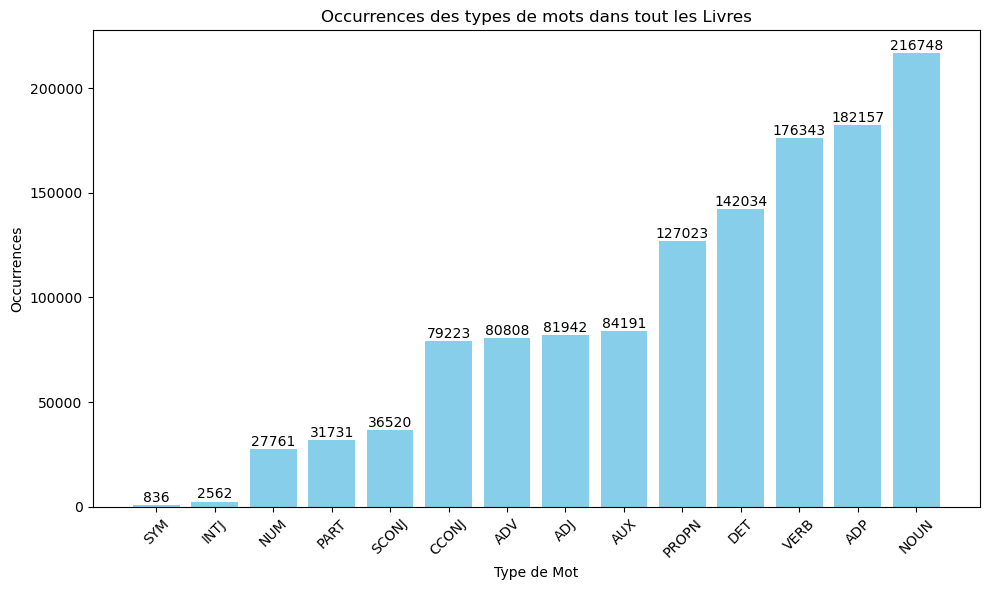

In [11]:

occurrences = df[types_de_mots].sum()
# Trier les occurrences par ordre croissant
occurrences_sorted = occurrences.sort_values(ascending=True)

# Créer un graphique à barres
plt.figure(figsize=(10, 6))
plt.bar(occurrences_sorted.index, occurrences_sorted, color='skyblue')
plt.xlabel('Type de Mot')
plt.ylabel('Occurrences')
plt.title('Occurrences des types de mots dans tout les Livres')

# Rotation des étiquettes de l'axe x pour une meilleure lisibilité
plt.xticks(rotation=45)

# Ajouter les valeurs au-dessus des barres
for i, v in enumerate(occurrences_sorted):
    plt.text(i, v + 20, str(v), ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

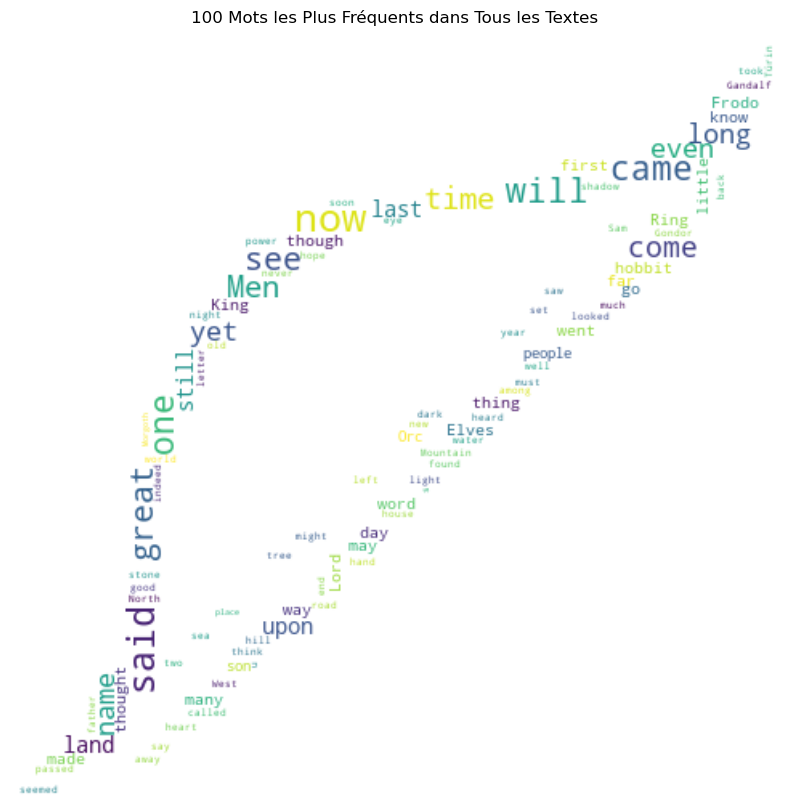

In [25]:
# Créer une liste pour stocker le contenu de tous les fichiers
contenu_complet = []

# Lire le contenu de chaque fichier et l'ajouter à la liste
for fichier in fichiers:
    with open(fichier, 'r', encoding='utf-8') as f:
        contenu = f.read()
        contenu_complet.append(contenu)

# Concaténer tous les textes en un seul
texte_complet = " ".join(contenu_complet)
mask = np.array(Image.open("arc.jpg"))

# Créer un WordCloud des 100 mots les plus fréquents
wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100, mask=mask).generate(texte_complet)

# Afficher le wordcloud
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("100 Mots les Plus Fréquents dans Tous les Textes")
plt.show()

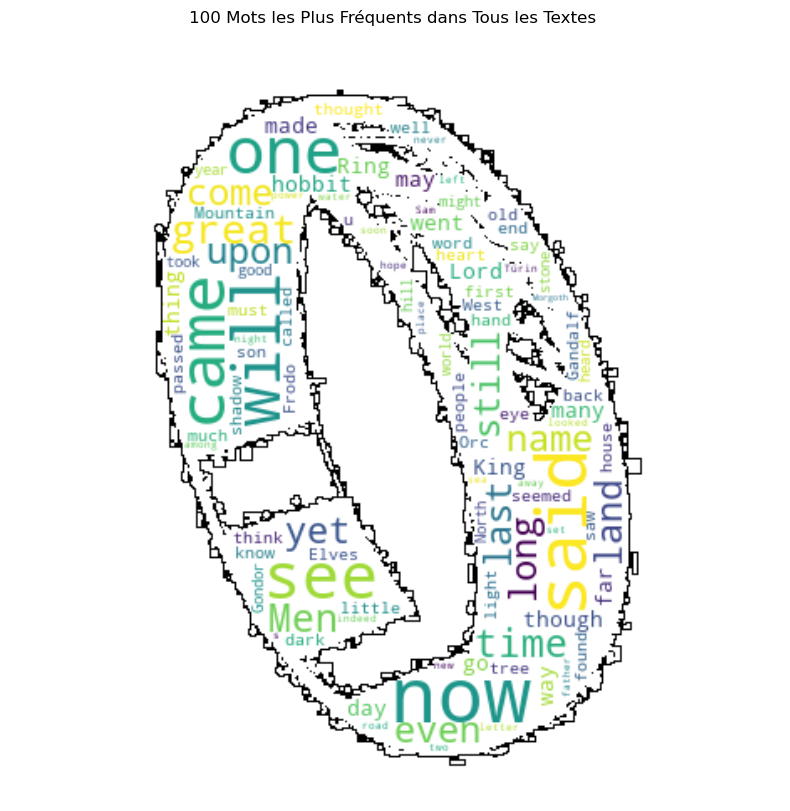

In [13]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
# Charger le masque d'image
masque_image = np.array(Image.open("bagues sda"))

# Créer un WordCloud avec le masque
wordcloud = WordCloud(width=800, height=400, background_color='white', mask=masque_image, contour_color='black',
                      contour_width=1, max_words=100).generate(texte_complet)

# Afficher le wordcloud
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("100 Mots les Plus Fréquents dans Tous les Textes ")
plt.show()